In [45]:
import sys
import os
import uproot

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk"))

import hipy.hipy.pltext  as pltext
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

pltext.style()

In [32]:
datapath = "/mnt/lustre/scratch/nlsas/home/usc/ie/dcr/hk/nicf_data/data/"
filename_bkg = "run_1766_signal_N20candidates_unfiltered.csv"
data_bkg     = pd.read_csv(datapath+filename_bkg)

filename_sig = "run_1767_signal_N20candidates_unfiltered.csv"
data_sig     = pd.read_csv(datapath+filename_sig)

In [ ]:
data_bkg

,event_id,hit_pmt_calibrated_times,hit_pmt_charges,hit_mpmt_card_ids,hit_mpmt_slot_ids,hit_pmt_channel_ids,hit_pmt_position_ids
0,0.0,76264.181597,79.0,27.0,2.0,9.0,3.0
1,0.0,76273.067467,209.0,118.0,55.0,3.0,18.0
2,1.0,209221.084343,103.0,114.0,19.0,13.0,12.0
3,1.0,209223.152791,119.0,114.0,19.0,12.0,4.0
4,1.0,209233.144440,175.0,114.0,19.0,10.0,10.0
...,...,...,...,...,...,...,...
2708303,383767.0,312021.117926,227.0,44.0,43.0,17.0,15.0
2708304,383767.0,312022.556373,69.0,36.0,46.0,10.0,10.0
2708305,383768.0,405073.289513,204.0,104.0,40.0,4.0,1.0
2708306,383768.0,405081.234585,142.0,89.0,89.0,18.0,16.0


In [66]:
data_bkg = data_bkg[(data_bkg["event_id"].values < 300e3) & (data_bkg["event_id"].values > 150e3)]
data_sig = data_sig[(data_sig["event_id"].values < 0.4e6) & (data_sig["event_id"].values > 0)]

In [67]:
data_by_event_bkg=data_bkg.groupby("event_id")
total_charge_by_event_bkg=data_by_event_bkg["hit_pmt_charges"].sum() #data_by_event["hit_pmt_charges"] con los [] seleccionamos
total_nhits_by_event_bkg = data_by_event_bkg.size()
total_trms_by_event_bkg  = data_by_event_bkg["hit_pmt_calibrated_times"].std()

data_by_event_sig=data_sig.groupby("event_id")
total_charge_by_event_sig=data_by_event_sig["hit_pmt_charges"].sum()
total_nhits_by_event_sig = data_by_event_sig.size()
total_trms_by_event_sig  = data_by_event_sig["hit_pmt_calibrated_times"].std()
#######################################################################
# #la columna hit_pmt_charges de cada grupo y luego sumamos sus valores
# print(total_charge_by_event)

# #==============CHATTY===========================================
# # Busco los 30 eventos con más hits
# top_30_charge=total_charge_by_event.nlargest(30) #crea una serie con los 30 valores más grandes de total_charge_by_event

# print("="*60)
# print("TOP 30 EVENTOS CON MÁS CARGA TOTAL")
# print("="*60)

# # Convertir a DataFrame con ranking desde 1
# top_30_df = top_30_charge.reset_index()
# top_30_df.columns = ['event_id', 'carga total']
# top_30_df.index = top_30_df.index + 1
# top_30_df.index.name = 'ranking'

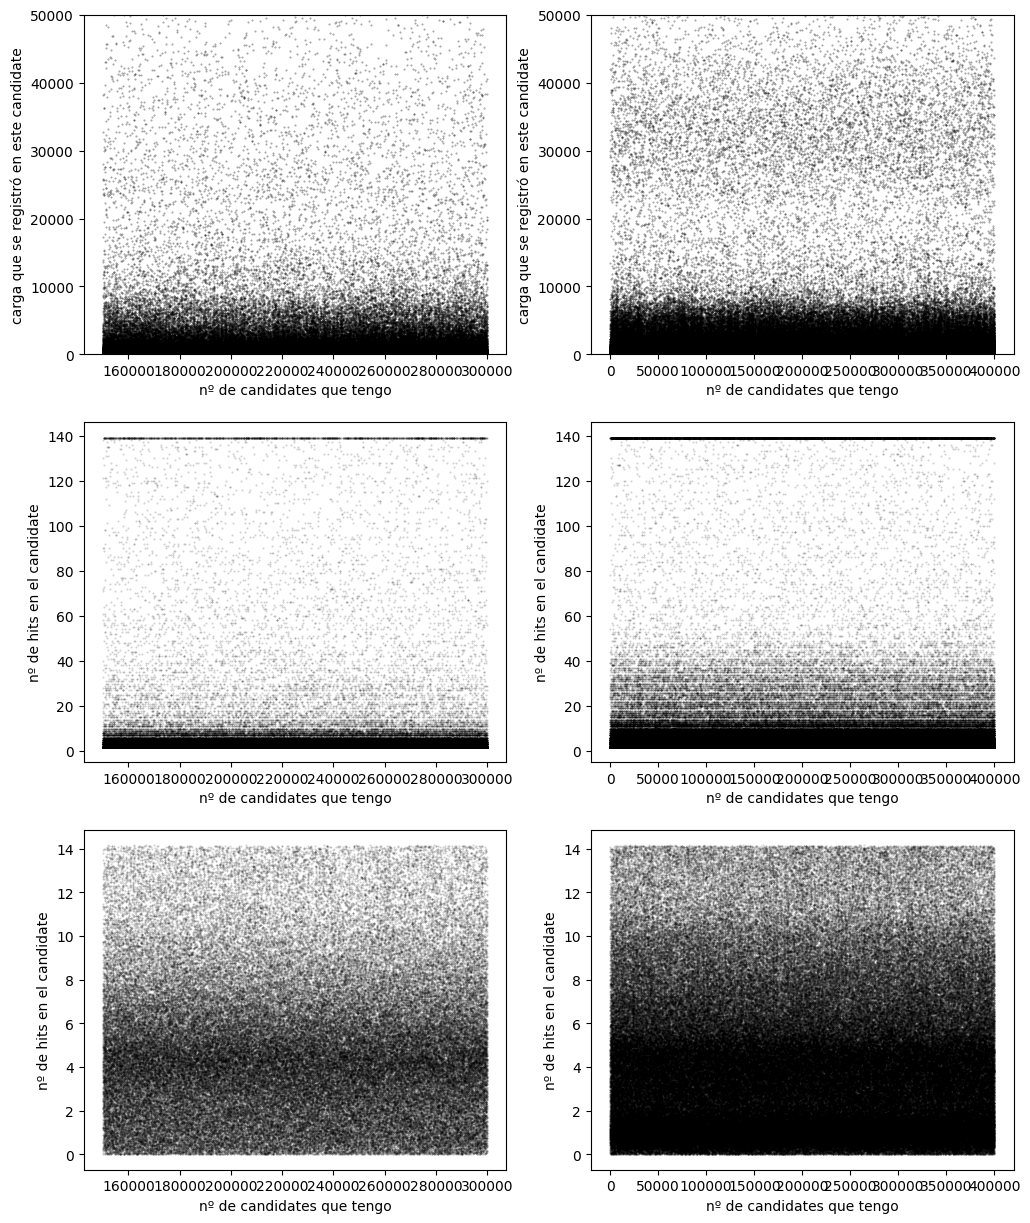

In [68]:
subplot = pltext.canvas(6)

subplot(1)
plt.scatter(total_charge_by_event_bkg.index, total_charge_by_event_bkg.values, s=0.2, alpha=0.4)
plt.xlabel("nº de candidates que tengo")
plt.ylabel("carga que se registró en este candidate"); #aquí no sé por qué pasa esto, debería haber sólo un valor??? creo q está bn así
plt.ylim(0, 50e3);

subplot(2)
plt.scatter(total_charge_by_event_sig.index, total_charge_by_event_sig.values, s=0.2, alpha=0.4)
plt.xlabel("nº de candidates que tengo")
plt.ylabel("carga que se registró en este candidate");
plt.ylim(0, 50e3);

subplot(3)
plt.scatter(total_nhits_by_event_bkg.index, total_nhits_by_event_bkg.values, s=0.2, alpha=0.2)
plt.xlabel("nº de candidates que tengo")
plt.ylabel("nº de hits en el candidate"); #aquí no sé por qué pasa esto, debería haber sólo un valor??? creo q está bn así
# plt.ylim(0, 40e3);

subplot(4)
plt.scatter(total_nhits_by_event_sig.index, total_nhits_by_event_sig.values, s=0.2, alpha=0.2)
plt.xlabel("nº de candidates que tengo")
plt.ylabel("nº de hits en el candidate"); #aquí no sé por qué pasa esto, debería haber sólo un valor??? creo q está bn así
# plt.ylim(0, 40e3);

subplot(5)
plt.scatter(total_trms_by_event_bkg.index, total_trms_by_event_bkg.values, s=0.2, alpha=0.2)
plt.xlabel("nº de candidates que tengo")
plt.ylabel("nº de hits en el candidate"); #aquí no sé por qué pasa esto, debería haber sólo un valor??? creo q está bn así
# plt.ylim(0, 40e3);

subplot(6)
plt.scatter(total_trms_by_event_sig.index, total_trms_by_event_sig.values, s=0.2, alpha=0.2)
plt.xlabel("nº de candidates que tengo")
plt.ylabel("nº de hits en el candidate"); #aquí no sé por qué pasa esto, debería haber sólo un valor??? creo q está bn así
# plt.ylim(0, 40e3);

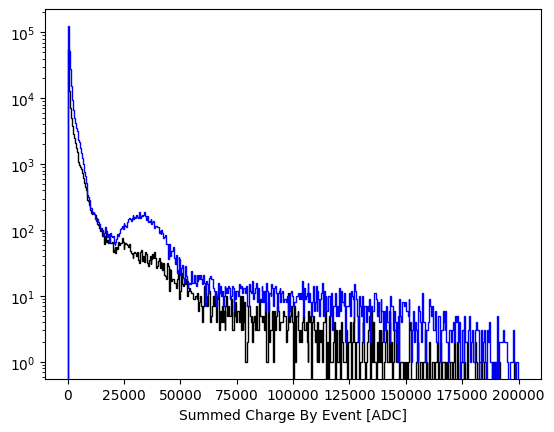

In [73]:
plt.hist(total_charge_by_event_bkg, 500, histtype="step", range=(0, 200e3));
plt.hist(total_charge_by_event_sig, 500, histtype="step", range=(0, 200e3));
plt.xlabel("Summed Charge By Event [ADC]");
plt.yscale("log");

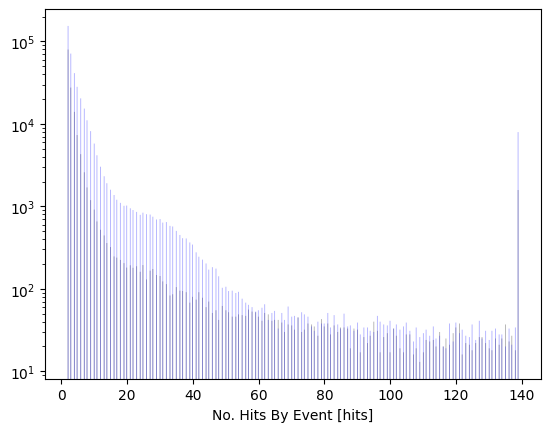

In [74]:
plt.hist(total_nhits_by_event_bkg, 500, histtype="stepfilled", alpha=0.3);
plt.hist(total_nhits_by_event_sig, 500, histtype="stepfilled", alpha=0.3);
plt.xlabel("No. Hits By Event [hits]");
plt.yscale("log");

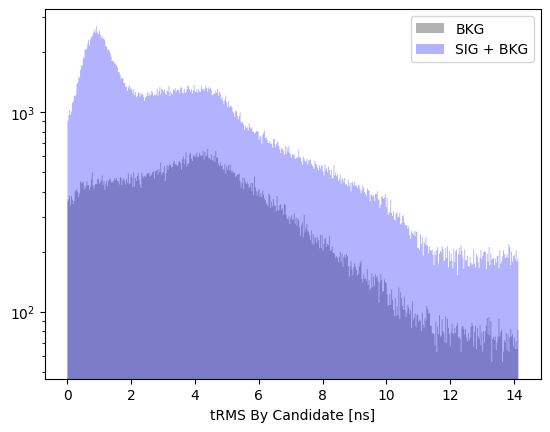

In [75]:
plt.hist(total_trms_by_event_bkg, 500, histtype="stepfilled", alpha=0.3, label="BKG");
plt.hist(total_trms_by_event_sig, 500, histtype="stepfilled", alpha=0.3, label="SIG + BKG");
plt.xlabel("tRMS By Candidate [ns]");
plt.yscale("log");
plt.legend();

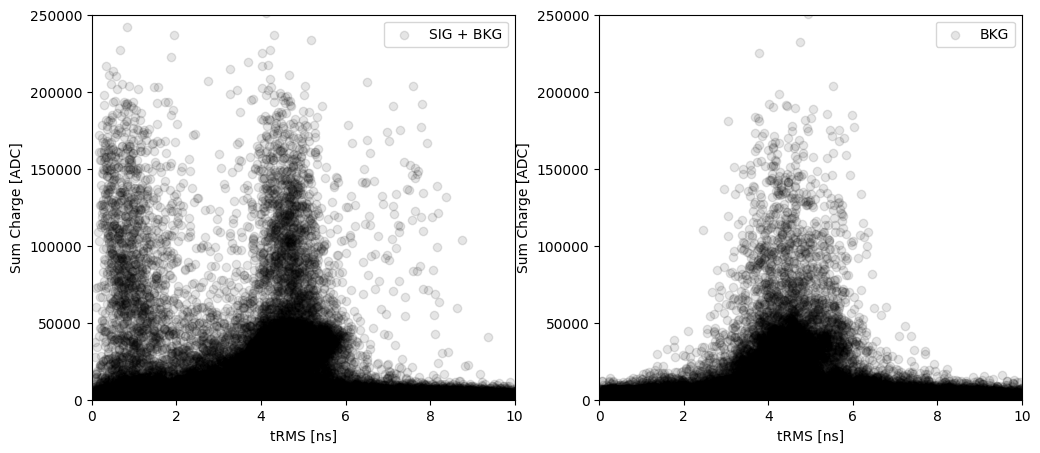

In [82]:
subplot = pltext.canvas(2)

subplot(1)
plt.scatter(total_trms_by_event_sig, total_charge_by_event_sig, alpha=0.1, label="SIG + BKG");
plt.xlabel("tRMS [ns]")
plt.ylabel("Sum Charge [ADC]")
plt.ylim(0, 250e3);
plt.xlim(0, 10);
plt.legend()

subplot(2)
plt.scatter(total_trms_by_event_bkg, total_charge_by_event_bkg, alpha=0.1, label="BKG");
plt.xlabel("tRMS [ns]")
plt.ylabel("Sum Charge [ADC]")
plt.ylim(0, 250e3);
plt.xlim(0, 10);
plt.legend();

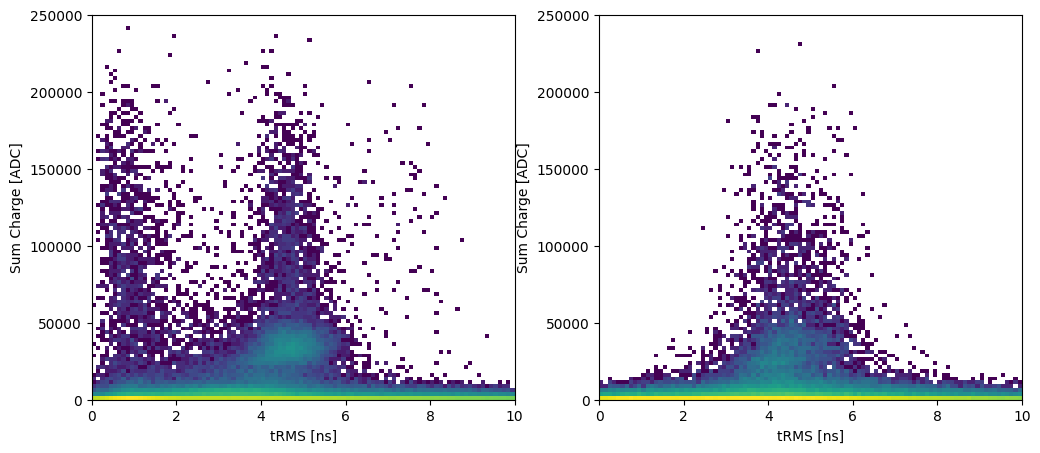

In [88]:
subplot = pltext.canvas(2)

subplot(1)
plt.hist2d(total_trms_by_event_sig, total_charge_by_event_sig, (100, 100), range=((0, 10), (0, 250e3)), norm="log");
plt.xlabel("tRMS [ns]")
plt.ylabel("Sum Charge [ADC]")
plt.ylim(0, 250e3);
plt.xlim(0, 10);

subplot(2)
plt.hist2d(total_trms_by_event_bkg, total_charge_by_event_bkg, (100, 100), range=((0, 10), (0, 250e3)), norm="log");
plt.xlabel("tRMS [ns]")
plt.ylabel("Sum Charge [ADC]")
plt.ylim(0, 250e3);
plt.xlim(0, 10);